# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyreadstat

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_excel("_TezVerisi.xlsx")

In [3]:
df.head()

,YasGrubu,Cinsiyet,MedeniDr,EğtDuzeyi,Meslek,ÇalışmaŞekli,ÇalışmaSaati,MesTecGrp,Bölüm,BlTec,...,ORTO2,ORTO3,ORTO4,ORTO5,GTO1,GTO2,GTO3,GTO4,GTO5,GTO6
0,3,1,1,2,3,3,2,4,2,2,...,2.500,3.833,1.400,1.500,5.000,2.429,5.000,3.500,1.000,4.750
1,3,1,1,3,3,3,2,3,2,1,...,2.500,3.500,2.400,1.000,4.833,2.143,4.600,3.750,3.250,3.750
2,2,2,1,5,1,1,2,2,2,2,...,2.500,1.667,2.000,3.000,4.000,4.571,5.000,4.750,1.500,4.000
3,3,2,1,3,4,1,2,4,3,2,...,2.833,3.000,3.200,1.000,3.667,2.429,4.000,4.000,2.250,4.000
4,2,1,1,4,3,3,2,3,2,1,...,3.167,3.333,2.400,1.500,2.667,2.714,2.400,4.000,4.250,3.000


## Exploratory Data Analysis and Visualization

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YasGrubu                    292 non-null    int64  
 1   Cinsiyet                    292 non-null    int64  
 2   MedeniDr                    292 non-null    int64  
 3   EğtDuzeyi                   292 non-null    int64  
 4   Meslek                      292 non-null    int64  
 5   ÇalışmaŞekli                292 non-null    int64  
 6   ÇalışmaSaati                292 non-null    int64  
 7   MesTecGrp                   292 non-null    int64  
 8   Bölüm                       292 non-null    int64  
 9   BlTec                       292 non-null    int64  
 10  RpEğtAlmaDurumu             292 non-null    int64  
 11  OlayaDahilOlma              292 non-null    int64  
 12  OlayaTanıkOlma              292 non-null    int64  
 13  RaprlamaYaptınmı            292 non

In [8]:
df.columns

Index(['YasGrubu', 'Cinsiyet', 'MedeniDr', 'EğtDuzeyi', 'Meslek',
       'ÇalışmaŞekli', 'ÇalışmaSaati', 'MesTecGrp', 'Bölüm', 'BlTec',
       'RpEğtAlmaDurumu', 'OlayaDahilOlma', 'OlayaTanıkOlma',
       'RaprlamaYaptınmı', 'GRS_Farkındalığı', 'GRS_NasılYaplıacağınıBilme',
       'OREO1', 'OREO2', 'ORTO1', 'ORTO2', 'ORTO3', 'ORTO4', 'ORTO5', 'GTO1',
       'GTO2', 'GTO3', 'GTO4', 'GTO5', 'GTO6'],
      dtype='object')

In [9]:
sns.heatmap(df_number.corr(), annot=True)

NameError: name 'df_number' is not defined

In [10]:
df_number.corr()[(df_number.corr()>= 0.9) & (df_number.corr() < 1)].any().any()

NameError: name 'df_number' is not defined

In [12]:
df['RaprlamaYaptınmı'].value_counts()

0    204
1     88
Name: RaprlamaYaptınmı, dtype: int64

## Train | Test Split and Scaling

In [13]:
X = df.drop('RaprlamaYaptınmı',axis=1)
y = df['RaprlamaYaptınmı']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [18]:
from sklearn.linear_model import LogisticRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [19]:
#help(LogisticRegression)

In [20]:
log_model = LogisticRegression()

In [21]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
log_model.coef_

array([[-0.89009698,  0.02255647,  0.05901045,  0.41078903,  0.90498044,
        -0.47190272,  0.21794041,  0.24354971,  0.16537442,  0.06150923,
         1.51310556, -0.11549814,  0.55997666,  0.14589793,  0.429017  ,
        -1.15108683, -1.81990217, -0.41224857, -0.07082356, -0.56612715,
        -0.25902007,  0.76923063, -0.76854737,  0.77551001, -0.03809631,
        -0.74542103,  0.7134756 ,  0.61423142]])

In [23]:
log_model.intercept_

array([-3.23831935])

In [24]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [25]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[9.14221456e-01, 8.57785440e-02],
       [2.24245109e-01, 7.75754891e-01],
       [6.78221157e-01, 3.21778843e-01],
       [9.99987238e-01, 1.27617655e-05],
       [9.87658826e-01, 1.23411743e-02],
       [9.99971388e-01, 2.86115769e-05],
       [7.07925700e-01, 2.92074300e-01],
       [9.99232957e-01, 7.67042716e-04],
       [9.99729955e-01, 2.70044937e-04],
       [9.99518693e-01, 4.81307412e-04],
       [9.58427034e-01, 4.15729664e-02],
       [9.99236014e-01, 7.63986325e-04],
       [9.41896309e-01, 5.81036914e-02],
       [9.99999785e-01, 2.15011177e-07],
       [9.13095938e-01, 8.69040623e-02],
       [9.99985455e-01, 1.45445407e-05],
       [1.63259456e-02, 9.83674054e-01],
       [9.87917412e-01, 1.20825877e-02],
       [9.02043726e-01, 9.79562744e-02],
       [7.49995744e-01, 2.50004256e-01],
       [1.87805380e-01, 8.12194620e-01],
       [4.78058409e-03, 9.95219416e-01],
       [9.42395764e-01, 5.76042356e-02],
       [9.81349781e-01, 1.86502188e-02],
       [1.328241

In [26]:
# X_test + y_yest + y_pred_proba + y_pred

## Model Performance on Classification Tasks

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [28]:
confusion_matrix(y_test,y_pred)

array([[38,  1],
       [ 4, 16]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        39
           1       0.94      0.80      0.86        20

    accuracy                           0.92        59
   macro avg       0.92      0.89      0.90        59
weighted avg       0.92      0.92      0.91        59



In [30]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [31]:
accuracy_score(y_test,y_pred)

0.9152542372881356

In [32]:
log_model.score(X_test_scaled, y_test)

0.9152542372881356

In [33]:
precision_score(y_test, y_pred)

0.9411764705882353

In [34]:
recall_score(y_test, y_pred)

0.8

In [35]:
f1_score(y_test,y_pred, average = "weighted")

0.9133879642354218

## Cross Validate

In [36]:
from sklearn.model_selection import cross_val_score, cross_validate

In [37]:
model = LogisticRegression()

scores = cross_val_score(model, X_train_scaled, y_train, cv=10)
print('Cross-Validation Mean of Accuracy Scores', scores.mean())
print("")
print(scores)

Cross-Validation Mean of Accuracy Scores 0.9184782608695652

[0.91666667 0.91666667 0.91666667 0.91304348 0.91304348 0.86956522
 0.95652174 0.86956522 0.95652174 0.95652174]


In [38]:
model = LogisticRegression()

scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring="f1_weighted")
print('Cross-Validation Mean of f1_weighted Scores', scores.mean())
print("")
print(scores)

Cross-Validation Mean of f1_weighted Scores 0.9174762409670961

[0.91203704 0.91666667 0.91927083 0.90835465 0.91304348 0.86652478
 0.95726975 0.86652478 0.95753522 0.95753522]


In [39]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
1,0.191,0.025,0.917,0.925,0.917,0.912
2,0.070,0.015,0.917,0.917,0.917,0.917
3,0.346,0.013,0.917,0.935,0.917,0.919
4,0.025,0.011,0.913,0.923,0.913,0.908
5,0.017,0.010,0.913,0.913,0.913,0.913
6,0.052,0.018,0.870,0.867,0.870,0.867
7,0.235,0.011,0.957,0.962,0.957,0.957
8,0.026,0.027,0.870,0.867,0.870,0.867
9,0.033,0.012,0.957,0.963,0.957,0.958
10,0.023,0.010,0.957,0.963,0.957,0.958


In [40]:
df_scores.mean()[2:]

test_accuracy             0.918
test_precision_weighted   0.924
test_recall_weighted      0.918
test_f1_weighted          0.917
dtype: float64

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

Purpose of ROC Curve:
    1. Analysing the strength/predictive power of a classifier.
    2. Determining optimal threshold.
    3. Comparing two models (using Area Under the Curve).

AUC represents a degree or measure of separability. It tells us how much the model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting the probability of class YES higher than the probability of class NO.

The ROC Curve was first used during World War II for the analysis of radar signals. After the attack on Pearl Harbor, the US army began new research to improve the rate of detection of Japanese aircraft from their radar signals. Needless to say, they did not want to miss any of them. Neither did they wish to waste their resources on false alarms. They measured the ability of a radar receiver operator to make these predictions called the Receiver Operating Characteristic. That is the origin of the name. The purpose of the curve was similar to how we use it to improve our machine learning models now. The aim was to analyse the predictive power of the predictor in ensuring the detection of as many true positives as possible while minimizing false positives.

https://towardsdatascience.com/demystifying-roc-curves-df809474529a

In [41]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

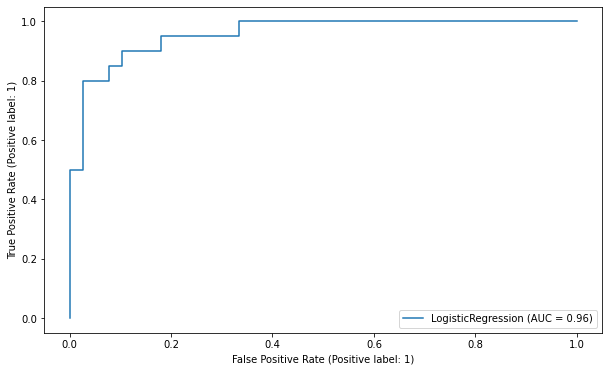

In [42]:
plot_roc_curve(log_model, X_test_scaled, y_test, response_method='auto');

In [43]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9576923076923077

In [44]:
roc_auc_score(y_test, y_pred)

0.8871794871794871

In [45]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])

In [46]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.29207429982412014

In [47]:
np.argmax(tp_rate - fp_rate)

8

In [48]:
roc_curve = {"fp_rate":fp_rate, "tp_rate":tp_rate, "thresholds":thresholds}
df_roc_curve = pd.DataFrame(roc_curve)
df_roc_curve

,fp_rate,tp_rate,thresholds
0,0.000,0.000,1.997
1,0.000,0.050,0.997
2,0.000,0.500,0.856
3,0.026,0.500,0.839
4,0.026,0.800,0.673
5,0.077,0.800,0.345
6,0.077,0.850,0.322
7,0.103,0.850,0.320
8,0.103,0.900,0.292
9,0.179,0.900,0.088


In [49]:
optimal_idx = np.argmax(df_roc_curve.tp_rate - df_roc_curve.fp_rate)
optimal_threshold = df_roc_curve.thresholds[optimal_idx]
optimal_threshold

0.29207429982412014

In [50]:
df_roc_curve.iloc[optimal_idx]

fp_rate      0.103
tp_rate      0.900
thresholds   0.292
Name: 8, dtype: float64

In [51]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[38  1]
 [ 4 16]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94        39
           1       0.94      0.80      0.86        20

    accuracy                           0.92        59
   macro avg       0.92      0.89      0.90        59
weighted avg       0.92      0.92      0.91        59



In [ ]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

## Final Model and Model Deployment

In [52]:
scaler = StandardScaler().fit(X)

In [53]:
import pickle
pickle.dump(scaler, open("scaler_tezim", 'wb'))

In [54]:
X_scaled = scaler.transform(X)

In [55]:
final_model = LogisticRegression().fit(X_scaled, y)

In [56]:
pickle.dump(final_model, open("scaler_tezim", 'wb'))

In [ ]:
# my_dict = {"age": [20, 30, 40, 50, 60],
#            "physical_score": [50, 30, 20, 10, 5]}

In [ ]:
sample = pd.DataFrame(my_dict)
sample

In [ ]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))

In [ ]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled

In [ ]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [ ]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [ ]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample